In [310]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Linear regression with gradient descent

In [470]:
class LinRegression:
    '''Linear Regression.'''

    def __init__(self):
        self.about = "Linear Regression by Sergei Bernadsky"
        self.W = [] # model's weights
        self.fscaling = False # is feature scaling used
        
    def cost(self, y_real, y_pred): 
        # cost function for gradient descent algorithm
        return np.sum((y_pred-y_real)**2)/(len(y_real))
    
    def gradient_descent_step(self, learning_rate, dy, m, n, X_tr):
        # one gradient descent step
        s = (np.dot(dy.T, X_tr)).reshape(n, 1)
        dW = 2*(learning_rate*s/m).reshape(n, 1)
        return self.W - dW
    
    def normalize(self, X):
        # normilize X table
        for j in range(X.shape[1]):
            X[:,j] = X[:,j]/np.max(X[:,j])
        return X
    
    def fit(self, X, y, learning_rate = 0.99, nsteps = 3000, e = 0.000000001,
            weight_low = 0, weight_high = 1,
            fscaling = False, kweigths = 1, random_state = 0):
        # train our Linear Regression model
        
        np.random.seed(random_state)
        X = X.astype(float)
        
        # Normilize process
        if fscaling == True:
            X = self.normalize(X)
            self.fscaling = True

        m = X.shape[0]
        # add one's column to X
        X = np.hstack( (np.ones(m).reshape(m, 1), X) )
        n = X.shape[1]
        
        # Weights: random initialization
        self.W = np.random.randint(low = weight_low, high = weight_high, size=(n, 1))
            
        y_pred = np.dot(X, self.W)
        cost0 = self.cost(y, y_pred)

        y = y.reshape(m, 1)
        k = 0
        
        ########## Gradient descent's steps #########
        while True:
            dy = y_pred - y
            W_tmp = self.W
            self.W = self.gradient_descent_step(learning_rate, dy, m, n, X)
            y_pred = np.dot(X, self.W)

            cost1 = self.cost(y, y_pred)
            k += 1

            if (cost1 > cost0):
                self.W = W_tmp
                break    
                
            if ((cost0 - cost1) < e) or (k == nsteps):
                break
                
            cost0 = cost1
        #############################################

        return self.W # return model's weights
    
    def predict(self, X):
        m = X.shape[0]
        if self.fscaling == False:
            return np.dot( np.hstack( (np.ones(m).reshape(m, 1),
                                       X.astype(float)) ) ,
                          self.W)
        else:
            return np.dot( np.hstack( (np.ones(m).reshape(m, 1),
                                       self.normalize(X.astype(float))) ),
                          self.W)       

# 1. Test on 'Diabetes' dataset

### a). My model

In [480]:
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

MSE1 (My LR model): 2859.95807152


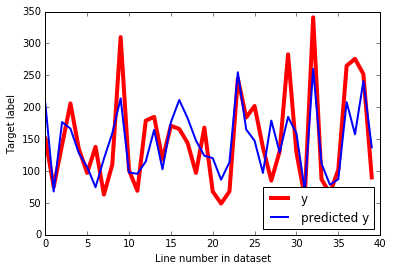

Wall time: 502 ms


In [481]:
%%time

lr = LinRegression()
lr.fit(X, y, learning_rate = 0.997, random_state = 0, weight_low = -900, weight_high = 900, nsteps=3000)

xx = [i for i in range(X.shape[0])]
y1 = lr.predict(X)
print 'MSE1 (My LR model):', mean_squared_error(y, y1)

f=0
t=40
plt.plot(xx[f:t], y[f:t], color='r', linewidth=4, label='y')
plt.plot(xx[f:t], y1[f:t], color='b', linewidth=2, label='predicted y')
plt.ylabel('Target label')
plt.xlabel('Line number in dataset')
plt.legend(loc=4)
plt.show()


### b). Same test for Linear Regression from Sklearn

In [482]:
from sklearn.linear_model import LinearRegression

In [483]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

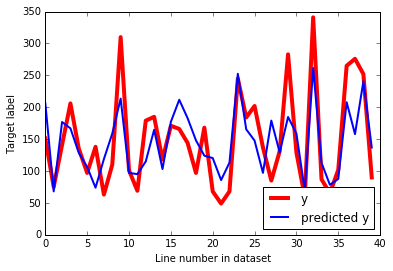

Wall time: 365 ms


In [484]:
%%time

lr2 = LinearRegression()
lr2.fit(X,y)
y2 = lr2.predict(X)

plt.figure()
plt.plot(xx[f:t], y[f:t], color='r', linewidth=4, label='y')
plt.plot(xx[f:t], y2[f:t], color='b', linewidth=2, label='predicted y')
plt.ylabel('Target label')
plt.xlabel('Line number in dataset')
plt.legend(loc=4)
plt.show()

### c). MSE (let's compare two models)

In [485]:
print 'MSE1 (My LR model):', mean_squared_error(y, y1)
print 'MSE2 (sklearn LR model):', mean_squared_error(y, y2)

MSE1 (My LR model): 2859.95807152
MSE2 (sklearn LR model): 2859.69039877


# 2. Test on 'BOSTON' dataset

In [554]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
y = boston.target

### a). My model

MSE1 (My LR model): 21.8977803753


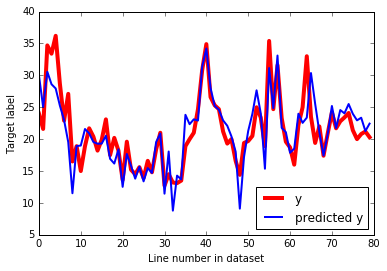

Wall time: 1.35 s


In [559]:
%%time

lr = LinRegression()
lr.fit(X, y, learning_rate = 0.2, random_state = 0, nsteps=20000, fscaling = True)

xx = [i for i in range(X.shape[0])]
y1 = lr.predict(X)
print 'MSE1 (My LR model):', mean_squared_error(y, y1)

f=0
t=80
plt.plot(xx[f:t], y[f:t], color='r', linewidth=4, label='y')
plt.plot(xx[f:t], y1[f:t], color='b', linewidth=2, label='predicted y')
plt.ylabel('Target label')
plt.xlabel('Line number in dataset')
plt.legend(loc=4)
plt.show()


###  b). Same test for Linear Regression from Sklearn

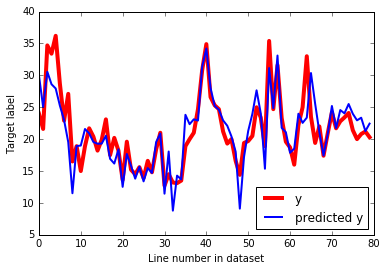

Wall time: 385 ms


In [560]:
%%time

lr2 = LinearRegression()
lr2.fit(X,y)
y2 = lr2.predict(X)

plt.figure()
plt.plot(xx[f:t], y[f:t], color='r', linewidth=4, label='y')
plt.plot(xx[f:t], y2[f:t], color='b', linewidth=2, label='predicted y')
plt.ylabel('Target label')
plt.xlabel('Line number in dataset')
plt.legend(loc=4)
plt.show()

### c). MSE (let's compare two models)

In [561]:
print 'MSE1 (My LR model):', mean_squared_error(y, y1)
print 'MSE2 (sklearn LR model):', mean_squared_error(y, y2)

MSE1 (My LR model): 21.8977803753
MSE2 (sklearn LR model): 21.8977792177
